# Gutenberg Full Random Window Dataset with flat LSTM
Flat LSTM analysis with the Gutenberg Full dataset with random windows read from the text. Using the following configuration:
1. Using Learned Embedding
1. Embedding size: 100
1. Document embedding size: 500
1. Using document length of 5,000
1. Top vocabulary count 500
1. Adam Learning Rate of 1e-3
1. L2-contraint 0.001

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.university.gutenberg import gb_full_flat_lstm
from ai_lit.university.gutenberg.gb_full_university import TextWindow

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Found 1 runs. Looking for one with a matching TensorFlow configuration.
Run 20180124-202414 is the latest run with a matching configuration. Selecting this one.
Accuracy: 0.422096153846
F1: 0.346994452611


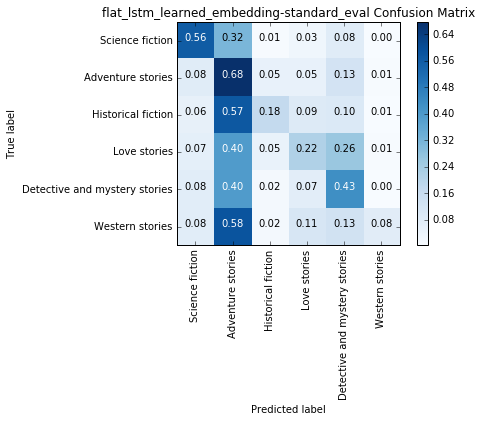

In [2]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.document_length = 100
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.word_embedding_size=100
tf.flags.FLAGS.word_embedding_size=500

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_random_window')
model_name = 'flat_lstm_learned_embedding'
evaluation_name = 'standard_eval'
univ = gb_full_flat_lstm.GbFullFlatLstmUniversity(model_name, training_wkspc, dataset_wkspc, text_window=TextWindow.random)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)

Validation Step 51
Targets:
[1 1 4 4 1 3 1 0 0 2 5 0 1 1 1 1 3 2 3 1]
Predictions:
[3 4 3 3 3 3 4 4 4 3 3 4 3 3 3 3 0 4 3 1]
Loss 2.1975, Acc 0.15

Testing examples exhausted
Shutting down all network threads
Accuracy: 0.343269230769
F1: 0.204559893312


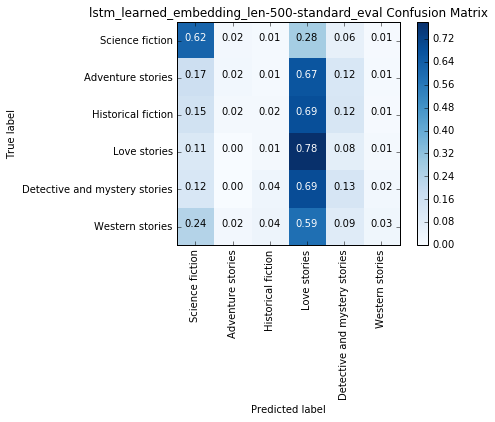

In [3]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.document_length = 5000
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.word_embedding_size=100
tf.flags.FLAGS.doc_embedding_size=500

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_random_window')
model_name = 'lstm_learned_embedding_len-500'
evaluation_name = 'standard_eval'
univ = gb_full_flat_lstm.GbFullFlatLstmUniversity(model_name, training_wkspc, dataset_wkspc, text_window=TextWindow.random)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)